#Finite Differece Code for Hele-Shaw Cell aka. Poiseuille Flow in 2D

## Importing Libraries

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import math
from pylab import *

## Parameters

Assuming the incompressible Navier-Stokes Equation:
$${\partial u_x\over \partial t}=-{1\over \rho}{\partial p\over \partial x}+\nu{\partial^2 u_x \over \partial y^2},$$
we know from the nature of the problem that ${\partial p \over \partial x}={\Delta p\over L}$. Namely the above becomes:
$${\partial u_x\over \partial t}=-{1\over \rho}{\Delta p\over L}+\nu{\partial^2 u_x \over \partial y^2}.$$
Where we define the above parameters below. For simplicity let 
$$\xi={1\over \rho}{\Delta p\over L} $$
such that
$${\partial u_x\over \partial t}=-\xi+\nu{\partial^2 u_x \over \partial y^2}.$$

In [2]:
from IPython.display import Image
Image(filename = 'images/poiseuille.png')

IOError: [Errno 2] No such file or directory: u'images/poiseuille.png'

In [3]:
rho= 1000 #[kg/m^3]
deltaP=100000 #[Pa]
L=15 #length of tube in [m], assuming that the flow is 1D, though
nu= 1 # [m^2/s]
I=2 # upward dimension of tube, analogous to diameter of circular tube
deltaT= 0.5 # time step in [s]
lengthT=60 #duration of time in [s]
deltaY= 0.01 # [m], discretization in space
u0=0; #[m/s] BC at bottom face, no slip
uD=0; #[m/s] BC at top face, no slip
mu=nu*rho
def uI(y,I): return y*(I-y) # initial condition function in [m/s]
xi=(1.0/(rho))*(deltaP/L) # parameter for the first term of the diff eq

## Finite Difference Code Implementation

Here we iplement a finite difference code for the above equations with the above parameters.

The code is implemented using a center difference discretization in space. 

In [4]:
#calculating using finite difference
y=np.linspace(-I,I,2*I/deltaY)
t=np.linspace(0,lengthT,lengthT/deltaT)
A=np.zeros((len(y),len(y)))
for ii in range(0,len(y)):
    A[ii,ii]=2
    if ii!=0:
        A[ii,ii-1]=-1
        A[ii-1,ii]=-1
print 'A=',A
A=A*(deltaY**-2)
ff=np.ones((len(y)))*xi
u=np.linalg.solve(A,ff)

A= [[ 2. -1.  0. ...,  0.  0.  0.]
 [-1.  2. -1. ...,  0.  0.  0.]
 [ 0. -1.  2. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  2. -1.  0.]
 [ 0.  0.  0. ..., -1.  2. -1.]
 [ 0.  0.  0. ...,  0. -1.  2.]]


In [5]:
#Calculating the analytical values
u_comp=(deltaP/(nu*rho*L))*(I**2-y**2)

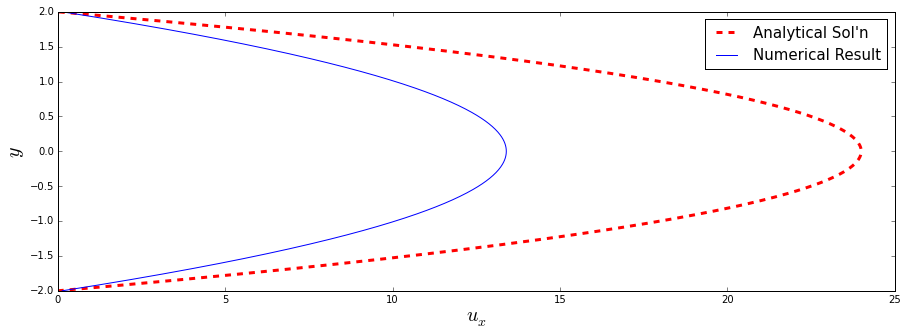

In [6]:
fig = plt.figure(figsize=(15,5))
plt.plot(u_comp,y,'--r',label='Analytical Sol\'n',linewidth=3)
plt.plot(u,y,label='Numerical Result')
plt.xlabel('$u_x$',fontsize=20)
plt.ylabel('$y$',fontsize=20)
plt.legend(fontsize=15)
plt.show()

Hm. What is up with dis?

# Bryan thoughts

Solving for the steady state behavior is harder to come up with than the non-steady state behavior ironically. Let's sketch it out quickly. Our steady state equation is

$$0 = -\frac{\zeta}{\nu} + \frac{d^2 w}{dy^2}$$

Discretizing and moving things around, we find, where $w_k$ is the $k$th point on the y-grid,

$$ w_k = -\frac{\zeta \Delta y^2}{2 \nu} + w_{k+1} + w_{k-1}$$

How does this help us? We can turn it into a matrix equation and solve via an inverse which you were trying to do above (which was quite clever!)

We define a column vector $\vec w$. We define $\vec{B}=$ column vector of the constant $-\frac{\zeta \Delta y^2}{2 \nu}$. Lastly, we define a matrix $A$ such that

$$A_{ij} = \delta_{i,i+1} + \delta_{i,i-1}$$

Our equation can then be rewritten as 

$$\vec{w} = \vec{B} + A \vec{w}$$

We rewrite this as

$$(I - A)\vec{w} = \vec{B}$$

Note that $I$ is the identity matrix. We then define $Q = (I-A) \vec{w}$; a new matrix. Our equation then becomes

$$Q\vec{w} = \vec{B}$$

The solution for $w$ then becomes

$$\vec{w} = Q^{-1}\vec{B}$$

This is all you have to do for the steady state. If you want to dynamically *evolve* to the steady state, which is what we discussed yesterday, you have to implement my algorithm and step it forwards in time until you *converge* to the steady state. You can't just run it once. Both of these methods should give the same result.